<a href="https://colab.research.google.com/github/hungryjins/DA_portfolio/blob/main/Chapter16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** Chapter 16 **
** ┗ Search for purchasing rules through analysis of related rules **
---
> ** Contents (context) **

* Looking at the problem situation and data
* Definition of problem solving process
* 🥉Session 1 -「Purchase Data Prepare and Search」
* 🥈SESSION 2 -「Search of Purchase Rules」
* 🥇Session 3 -「A significant purchase rules」


In [ ]:
# ▶ Remove Warnings
import warnings
warnings.filterwarnings('ignore')

# ▶ Google Drive Mount
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/DA portfolio/DA_colab/16_Purchase Pattern Discovery via Association Rule Analysis')
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/DA portfolio/DA_colab/16_Purchase Pattern Discovery via Association Rule Analysis'

## ** Looking at the problem situation and data **
---
> ** Scenario ** 🧺 (marketer, service planner, service operator)

``
A -Mart believed that the decrease in autocarcinological sales had a problem with the display.
Therefore, we are planning to display the display.We try to place them in the stands close to each other.
We use the customer's purchase data (POS) to check the products sold together and adjust the layout based on it.

``


> ** Looking at the data **

* Shopping cart data
* YES or No Data for each customer (ROW) purchase item


In [ ]:
# ▶ Data read
import pandas as pd
df = pd.read_csv('chapter16_market_basket.csv', header=None)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



## ** Problem solving process definition **
---
> ** ** of the problem

``
▶ Continuous decrease in sales
``

> ** Expected effect **

``
▶ Sales increase, recovery
``

> ** Solution **

``
▶ Rearrangement of the layout of the layout through the analysis of related rules
▶ Session 1 🥉
-Data pretreatment for data pretreatment and association rules analysis
▶ Session 2 🥈
-Searching rules using APRIORI algorithms
▶ Session 3 🥇
-The significant rule exploration using Support / Confidence / LIFT
``

> ** Performance measurement **

``
▶ Comparison of sales before/after improvement of layouts
``

> ** Public application **

``
▶ Reinstallation of layouts for each stand in accordance with meaningful rules
``


> ** Main code preview **

``
▶ Session 1 → PD.ISNA (), TransactionEncoder ()
▶ Session 2 → APRIORI (), Association_rules ()
▶ Session 3 → Support/confidence/LIFT understanding
``


## ** 🥉Session 1 **
** ┗ Purchase data pretreatment and search **
---


### · Data pretreatment
---
* Check the basic information of the collected data

(1) Data Shape Check

(2) Check Data Type

(3) NULL value check (※ Data of empty values)

(4) Outlier verification (※ Data beyond normal category)


In [ ]:
# ▶ Data type confirmation
# ▶ It consists of 7,501 row, 20 cola
print('df', df.shape)

df (7501, 20)


In [ ]:
# ▶ Data Type Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [ ]:
# ▶ Check NULL value
print(df.isnull().sum())

0        0
1     1754
2     3112
3     4156
4     4972
5     5637
6     6132
7     6520
8     6847
9     7106
10    7245
11    7347
12    7414
13    7454
14    7476
15    7493
16    7497
17    7497
18    7498
19    7500
dtype: int64


### · Analysis of related rules -data pretreatment
---


In [ ]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# ▶ It runs for each ROW, and increases the COL one by one and returns it if it is a NULL value.
# ▶ In the for statement
records = []
for i in range(len(df)):
    records.append([str(df.values[i,j]) for j in range(len(df.columns)) if not pd.isna(df.values[i,j])])

In [ ]:
# ▶ Result (1)
print(records[3])

['turkey', 'avocado']


In [ ]:
# ▶ TransactionEncoder: Make all list values ​​unique and change to COL, change data in the same form for each row
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(records).transform(records)

te_df = pd.DataFrame(te_ary, columns=te.columns_)

In [ ]:
len(te.columns_)

120

In [ ]:
# ▶ Results (2), completed data pretreatment for analysis of related rules
te_df

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## ** 🥈Session 2 **
** ┗ Purchase Rules Search **
---


In [ ]:
te_df.head(5)

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
# ▶ No NULL value is not available for preprocessing data
te_df.isnull().sum()

,0
asparagus,0
almonds,0
antioxydant juice,0
asparagus,0
avocado,0
...,...
whole wheat pasta,0
whole wheat rice,0
yams,0
yogurt cake,0


### · APRIORI use rules used
---
* What is a related rules?
``
-Dopling the rules to be purchased together from non -map learning, large -scale trading data
-When purchasing a specific product, it is recommended to recommend products that are highly related to this (※ Recommended system)
-Reforms of events that occur frequently when certain events occur
``

* APRIORI algorithm?
``
-Algorithms that create rules through a set of frequent items
-Smits of frequent items → Series with more than minimum maps
``

* Intestinal/disadvantages
``
-Atcovers: You can find many related rules
-Dealing: Difficulty finding significant rules in terms of business aspects
``

* Examples of use
``
-DNA pattern exploration that occurs frequently in cancer data
-The marts are recommended and displayed through shopping cart analysis
-Patterns of alarm code before facility failure occurs
``

* Principle of operation
``
Step 1: Discover the type of event frequently occurring in the entire data set
Step 2: Discover a set of frequent items that are more than a minimum support map.
Step 3: Create a set in frequent items
Step 4: Until there is no new set of empty items,
Step 5: Create related regulations using a set of empty items
``



In [ ]:
# ▶ MAX_LEN = 3, related regulations with up to 3 lists

from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemset = apriori(te_df,
                           min_support=0.005,
                           max_len=3,
                           use_colnames=True)

frequent_itemset['length'] = frequent_itemset['itemsets'].apply(lambda x: len(x))
frequent_itemset.sort_values('support',ascending=False,inplace=True)

In [ ]:
# ▶ Output of overall related rules
frequent_itemset

,support,itemsets,length
60,0.238368,(mineral water),1
27,0.179709,(eggs),1
83,0.174110,(spaghetti),1
33,0.170911,(french fries),1
20,0.163845,(chocolate),1
...,...,...,...
351,0.005066,"(yogurt cake, french fries)",2
646,0.005066,"(eggs, tomatoes, mineral water)",3
648,0.005066,"(eggs, olive oil, spaghetti)",3
674,0.005066,"(soup, mineral water, frozen vegetables)",3


In [ ]:
# ▶ Output of related rules with two or more ITEM items
frequent_itemset[frequent_itemset['length'] >= 2].head(10)

,support,itemsets,length
503,0.059725,"(spaghetti, mineral water)",2
227,0.052660,"(chocolate, mineral water)",2
292,0.050927,"(eggs, mineral water)",2
478,0.047994,"(milk, mineral water)",2
432,0.040928,"(ground beef, mineral water)",2
439,0.039195,"(ground beef, spaghetti)",2
236,0.039195,"(chocolate, spaghetti)",2
299,0.036528,"(eggs, spaghetti)",2
277,0.036395,"(eggs, french fries)",2
387,0.035729,"(mineral water, frozen vegetables)",2


In [ ]:
# ▶ When you want to find a specific rules, you have to put the correct rules
frequent_itemset[frequent_itemset['itemsets'] == frozenset(('bacon', 'asparagus'))]

,support,itemsets,length


In [ ]:
# ▶ For the rule created at the top, search for additional indicators
# ▶ Metric and Threshold Setting
association_rules_df = association_rules(frequent_itemset,
                                         metric='confidence',
                                         min_threshold=0.005)

In [ ]:
association_rules_df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,1.0,0.018223,1.159314,0.369437,0.169312,0.137421,0.296796
1,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,1.0,0.018223,1.102008,0.400606,0.169312,0.092566,0.296796
2,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,1.0,0.013604,1.122357,0.308965,0.150648,0.109018,0.271158
3,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,1.0,0.013604,1.073256,0.339197,0.150648,0.068256,0.271158
4,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,1.0,0.008090,1.062815,0.193648,0.138707,0.059103,0.248515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1935,"(pancakes, spaghetti)",(olive oil),0.025197,0.065858,0.005066,0.201058,3.052910,1.0,0.003407,1.169224,0.689825,0.058915,0.144732,0.138991
1936,"(olive oil, spaghetti)",(pancakes),0.022930,0.095054,0.005066,0.220930,2.324260,1.0,0.002886,1.161572,0.583127,0.044864,0.139098,0.137113
1937,(pancakes),"(olive oil, spaghetti)",0.095054,0.022930,0.005066,0.053296,2.324260,1.0,0.002886,1.032075,0.629602,0.044864,0.031078,0.137113
1938,(olive oil),"(pancakes, spaghetti)",0.065858,0.025197,0.005066,0.076923,3.052910,1.0,0.003407,1.056037,0.719852,0.058915,0.053063,0.138991


In [ ]:
# ▶ When you want to find a specific rules
association_rules_df[association_rules_df['consequents']==frozenset({'eggs'})]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
5,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,1.0,0.008090,1.043158,0.208562,0.138707,0.041372,0.248515
15,(spaghetti),(eggs),0.174110,0.179709,0.036528,0.209801,1.167446,1.0,0.005239,1.038081,0.173666,0.115126,0.036684,0.206533
17,(french fries),(eggs),0.170911,0.179709,0.036395,0.212949,1.184961,1.0,0.005681,1.042232,0.188267,0.115825,0.040521,0.207735
29,(chocolate),(eggs),0.163845,0.179709,0.033196,0.202604,1.127397,1.0,0.003751,1.028711,0.135143,0.106959,0.027910,0.193661
35,(milk),(eggs),0.129583,0.179709,0.030796,0.237654,1.322437,1.0,0.007509,1.076009,0.280119,0.110579,0.070640,0.204510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1830,"(turkey, spaghetti)",(eggs),0.016531,0.179709,0.005199,0.314516,1.750138,1.0,0.002229,1.196659,0.435821,0.027216,0.164340,0.171724
1842,"(shrimp, mineral water)",(eggs),0.023597,0.179709,0.005199,0.220339,1.226085,1.0,0.000959,1.052112,0.188852,0.026245,0.049531,0.124635
1875,(tomato juice),(eggs),0.030396,0.179709,0.005066,0.166667,0.927423,1.0,-0.000396,0.984349,-0.074682,0.024707,-0.015900,0.097428
1918,"(tomatoes, mineral water)",(eggs),0.024397,0.179709,0.005066,0.207650,1.155478,1.0,0.000682,1.035263,0.137922,0.025452,0.034062,0.117920


## ** 🥇Session 3 **
** ┗ Derivation of meaningful purchase rules **
---


### · Support/confidence/LIFT concept understanding
---

* Support: The probability of the rules of the entire trading items
> "How often is it?"

* Confidence: Conditions are also called a probability of transactions containing B in the transaction of A
> "Is there a high probability of buying beer when you buy a diaper?"

* LIFT: A and B are randomly probability (natural probability)
> "Is it higher than the probability of buying naturally?"


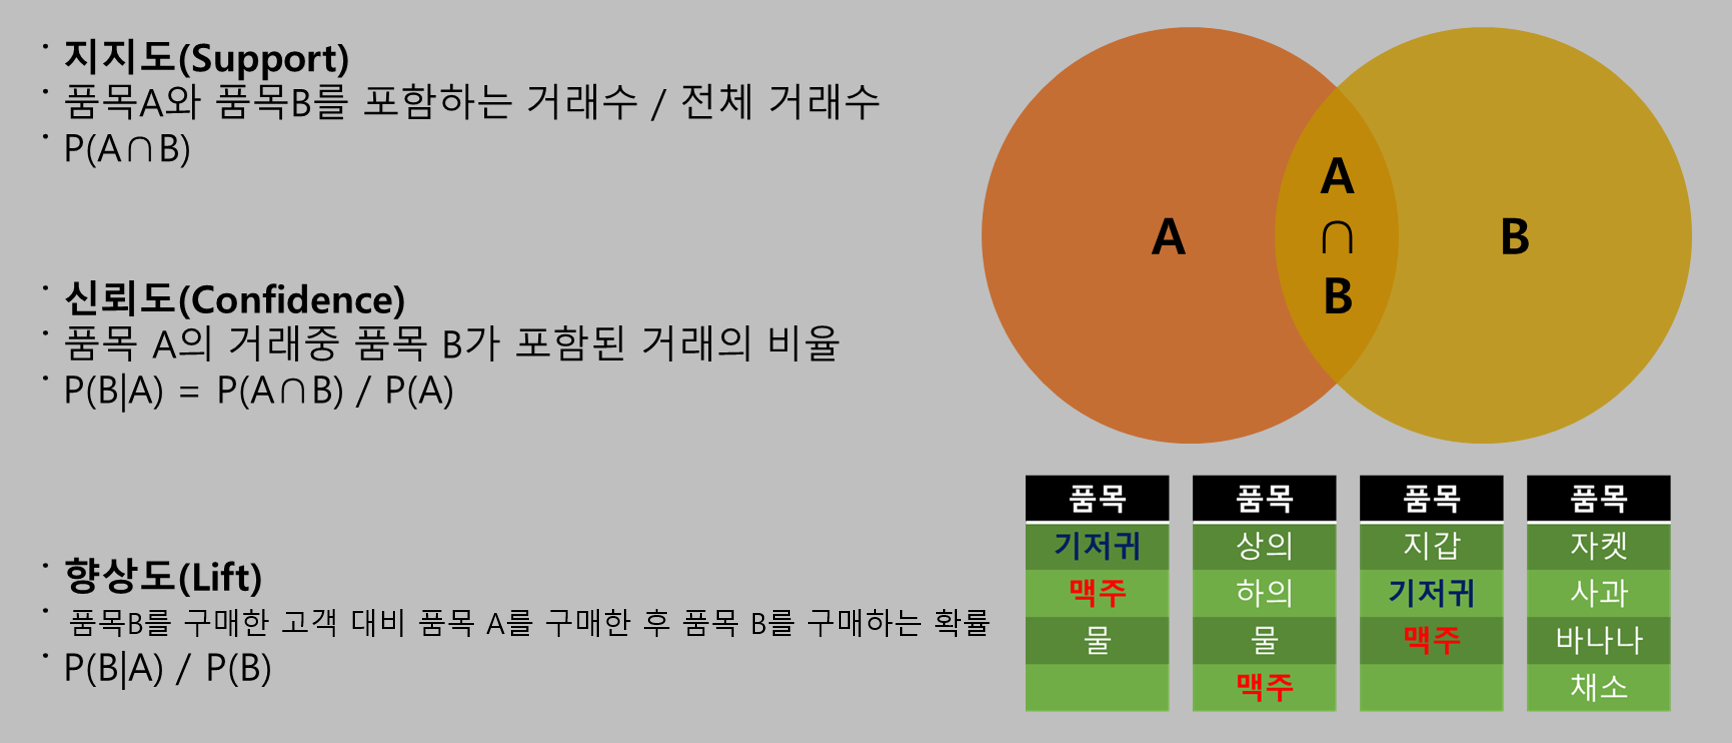

In [ ]:
from IPython.display import Image
Image("s_c_l.png")

* Support: The probability of the rules of the entire trading items
> 2/4 = 0.5

* Confidence: Conditions are also called a probability of transactions containing B in the transaction of A
> 2/3 = 0.67

* LIFT: A and B are randomly probability (natural probability)
> 0.67 / 0.5 = 1.34


### · Search for meaningful rules
---


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemset = apriori(te_df,
                           min_support=0.005,
                           max_len=5,
                           use_colnames=True)

frequent_itemset['length'] = frequent_itemset['itemsets'].map(lambda x: len(x))
frequent_itemset.sort_values('support',ascending=False,inplace=True)

In [ ]:
# ▶ 725 rules
frequent_itemset

,support,itemsets,length
60,0.238368,(mineral water),1
27,0.179709,(eggs),1
83,0.174110,(spaghetti),1
33,0.170911,(french fries),1
20,0.163845,(chocolate),1
...,...,...,...
351,0.005066,"(yogurt cake, french fries)",2
646,0.005066,"(eggs, tomatoes, mineral water)",3
648,0.005066,"(eggs, olive oil, spaghetti)",3
674,0.005066,"(soup, mineral water, frozen vegetables)",3


In [ ]:
rules['support'].mean(), rules['confidence'].mean()

(np.float64(0.008956302187364828), np.float64(0.15777570774772962))

In [ ]:
# ▶ Only significant rules with more than 1 LIFT (excellent for random effects)
rules = association_rules(frequent_itemset, metric="lift", min_threshold=1).sort_values(by = ['lift',  'confidence','support'], ascending =False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1297,(pasta),(escalope),0.015731,0.079323,0.005866,0.372881,4.700812,1.0,0.004618,1.468107,0.799853,0.065770,0.318851,0.223415
1296,(escalope),(pasta),0.079323,0.015731,0.005866,0.073950,4.700812,1.0,0.004618,1.062867,0.855100,0.065770,0.059149,0.223415
1787,(pasta),(shrimp),0.015731,0.071457,0.005066,0.322034,4.506672,1.0,0.003942,1.369601,0.790543,0.061688,0.269860,0.196465
1786,(shrimp),(pasta),0.071457,0.015731,0.005066,0.070896,4.506672,1.0,0.003942,1.059374,0.837987,0.061688,0.056046,0.196465
657,(whole wheat pasta),(olive oil),0.029463,0.065858,0.007999,0.271493,4.122410,1.0,0.006059,1.282270,0.780417,0.091603,0.220133,0.196475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552,(escalope),(tomatoes),0.079323,0.068391,0.005466,0.068908,1.007555,1.0,0.000041,1.000555,0.008144,0.038425,0.000555,0.074415
726,(escalope),(frozen vegetables),0.079323,0.095321,0.007599,0.095798,1.005011,1.0,0.000038,1.000528,0.005416,0.045491,0.000528,0.087759
727,(frozen vegetables),(escalope),0.095321,0.079323,0.007599,0.079720,1.005011,1.0,0.000038,1.000432,0.005512,0.045491,0.000432,0.087759
1206,"(mineral water, frozen vegetables)",(french fries),0.035729,0.170911,0.006133,0.171642,1.004279,1.0,0.000026,1.000883,0.004418,0.030585,0.000882,0.103762


In [ ]:
# ▶ Rules that are found a lot (※ Support)
rules = association_rules(frequent_itemset, metric="support", min_threshold=0.05).sort_values(by = ['support', 'lift', 'confidence'], ascending =False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,1.0,0.018223,1.159314,0.369437,0.169312,0.137421,0.296796
1,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,1.0,0.018223,1.102008,0.400606,0.169312,0.092566,0.296796
2,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,1.0,0.013604,1.122357,0.308965,0.150648,0.109018,0.271158
3,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,1.0,0.013604,1.073256,0.339197,0.150648,0.068256,0.271158
4,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,1.0,0.008090,1.062815,0.193648,0.138707,0.059103,0.248515
5,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,1.0,0.008090,1.043158,0.208562,0.138707,0.041372,0.248515


In [ ]:
# ▶ Rules to live together unconditionally (※ confidence)
rules = association_rules(frequent_itemset, metric="confidence", min_threshold=0.3).sort_values(by = ['confidence', 'lift', 'support'], ascending =False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
259,"(soup, frozen vegetables)",(mineral water),0.007999,0.238368,0.005066,0.633333,2.656954,1.0,0.003159,2.077178,0.628658,0.020994,0.518578,0.327293
244,"(soup, olive oil)",(mineral water),0.008932,0.238368,0.005199,0.582090,2.441976,1.0,0.003070,1.822476,0.595818,0.021476,0.451296,0.301951
153,"(olive oil, frozen vegetables)",(mineral water),0.011332,0.238368,0.006532,0.576471,2.418404,1.0,0.003831,1.798297,0.593226,0.026864,0.443918,0.301938
84,"(soup, milk)",(mineral water),0.015198,0.238368,0.008532,0.561404,2.355194,1.0,0.004909,1.736520,0.584287,0.034820,0.424136,0.298599
215,"(soup, chocolate)",(mineral water),0.010132,0.238368,0.005599,0.552632,2.318395,1.0,0.003184,1.702471,0.574488,0.023052,0.412618,0.288061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,"(chocolate, green tea)",(spaghetti),0.023464,0.174110,0.007066,0.301136,1.729574,1.0,0.002980,1.181761,0.431958,0.037089,0.153805,0.170859
35,(soup),(milk),0.050527,0.129583,0.015198,0.300792,2.321232,1.0,0.008651,1.244861,0.599484,0.092158,0.196697,0.209038
202,(mushroom cream sauce),(escalope),0.019064,0.079323,0.005733,0.300699,3.790833,1.0,0.004220,1.316568,0.750514,0.061871,0.240450,0.186484
198,"(frozen vegetables, french fries)",(milk),0.019064,0.129583,0.005733,0.300699,2.320520,1.0,0.003262,1.244697,0.580122,0.040112,0.196591,0.172469
